<a href="https://colab.research.google.com/github/vkjadon/sklearn/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Nearest Neighbors (KNN) is a classification and regression technique. To classify a data point or predict its value, KNN looks at the 'k' nearest neighbors (data points) in the training dataset. The most common class among these neighbors is assigned to the point in classification, or an average of the neighbors’ values is taken for regression. The distance between data points is typically measured using the Euclidean distance, but other distance metrics can be used depending on the problem. The example below shows the classification of data points into two classes based on two features. The training data points are plotted as circles, and the test data points are plotted as triangles, with different colors representing different classes.

##Importing relative modules and library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

##Generating dataset and split data

In [2]:
# Generate a synthetic dataset with 2 features for easy visualization
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Building a KNN classifier and performing classification

In the example below, a KNN classifier is created with n_neighbors=5, and is trained on the training data. A mesh grid is created over the feature space, and the classifier’s predictions are made for each point on this grid. This allows us to visualize the decision boundary created by the KNN algorithm.

In [3]:
# Create the KNN classifier and train it
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a mesh grid for visualization
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the output for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

The decision boundary is plotted using contourf(). The training data points are plotted as circles, and the testing data points are plotted as triangles, with different colors representing different classes.

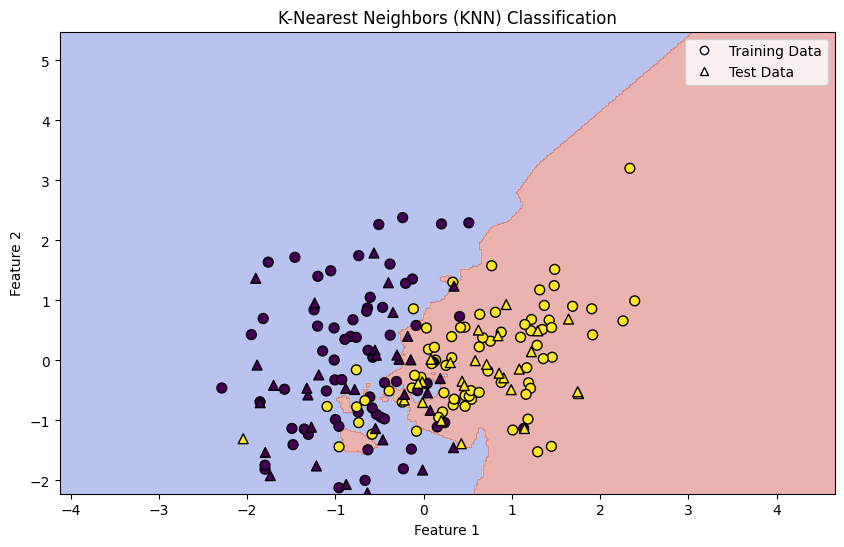

In [4]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# Plot the training and testing points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', s=50)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^', edgecolor='k', s=50)
legend_handles = []
legend_handles.append(plt.Line2D([0], [0], marker='o', markeredgecolor='k',  markerfacecolor='w', linestyle='', label='Training Data'))
legend_handles.append(plt.Line2D([0], [0], marker='^', markeredgecolor='k',  markerfacecolor='w', linestyle='', label='Test Data'))
plt.title("K-Nearest Neighbors (KNN) Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(handles=legend_handles,  loc='upper right')
plt.show()